In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
!pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create toy dataset
hair_color = np.array(['blonde', 'brunette', 'red', 'black', 'brunette', 'black', 'red', 'black'])
eye_color = np.array(['amber', 'gray', 'green', 'hazel', 'amber', 'gray', 'green', 'hazel'])
skin_color = np.array(['fair', 'brown', 'brown', 'brown', 'fair', 'brown', 'fair', 'fair'])
person = ['P1','P2','P3','P4','P5','P6','P7','P8']

In [3]:
data = pd.DataFrame({'person':person, 'hair_color':hair_color, 'eye_color':eye_color, 'skin_color':skin_color})
data = data.set_index('person')
data

hair_color eye_color skin_color
person                                
P1         blonde     amber       fair
P2       brunette      gray      brown
P3            red     green      brown
P4          black     hazel      brown
P5       brunette     amber       fair
P6          black      gray      brown
P7            red     green       fair
P8          black     hazel       fair

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 15.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 15.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 15.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 15.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 15.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 10.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2, cost: 9.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration:

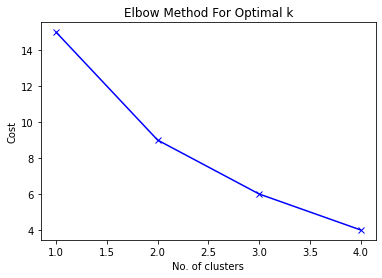

In [4]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters = num_clusters, init = "random", n_init = 5, verbose = 1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [5]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 9.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 7.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 6.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1, cost: 7.0
Run 5, iteration: 2/100, moves: 0, cost: 7.0
Best run was number 4


array([2, 0, 1, 0, 2, 0, 1, 2], dtype=uint16)

In [6]:
data.insert(0, "Cluster", clusters, True)
data

Cluster hair_color eye_color skin_color
person                                         
P1            2     blonde     amber       fair
P2            0   brunette      gray      brown
P3            1        red     green      brown
P4            0      black     hazel      brown
P5            2   brunette     amber       fair
P6            0      black      gray      brown
P7            1        red     green       fair
P8            2      black     hazel       fair

In [18]:
df = pd.read_csv("tak_gtx_physician_quotes.csv")
df.head(10)

Physician_Id  Practitioner_Id   Me_Number Dea_Number       Last_Name  \
0      22568412         22568411  6493395003  FG1140944  GONZALEZ-AYALA   
1      22568442         22568441  6540100165  BN8867523          NADDAF   
2      22568815         28232880  7590198007  BK8855453      KULIKOWSKI   
3      22569083         49972908  9135789001  FR7277280           ROLFE   
4      22569139         31288896  9150388027  BE9639925        ELSHAFEI   
5      22700305          4075720  7041687055  BM4994655           AHMED   
6      22705010         39285557  A101005920  MH2103113            HULL   
7      22705072         22705071  A101009300  MS1435381          STOUGH   
8      22711080         39209583  0000140675  FH6678138           HOVER   
9      22712156          1697408  0384148057  AS1957692         COLBURN   

  First_Name                                            Address  \
0     RAFAEL  1605 SOUTH 31ST STREET CENTER FOR DIAGNOSTIC M...   
1       NAJA                           806 S DOUGLAS RD STE 820   
2      PIOTR                            6400 CLAYTON RD STE 303   
3     NATALI                                   1044 BELMONT AVE   
4     ASHRAF                                        420 64TH ST   
5      STEVE                                      1700 W FM 700   
6  CHRISTINA                                     18 E LAUREL RD   
7       CHAD                                    915 THORNTON RD   
8       MARA                                103 MEDICINE WAY RD   
9       JANE                                           5 OLD RD   

             City State    Zip Specialty_Code Specialty_Description  \
0          TEMPLE    TX  76508             IM     INTERNAL MEDICINE   
1           MIAMI    FL  33134             IM     INTERNAL MEDICINE   
2     SAINT LOUIS    MO  63117             IM     INTERNAL MEDICINE   
3      YOUNGSTOWN    OH  44504             IM     INTERNAL MEDICINE   
4        BROOKLYN    NY  11220              P            PSYCHIATRY   
5      BIG SPRING    TX  79720             PD            PEDIATRICS   
6       STRATFORD    NJ   8084            ORS    ORTHOPEDIC SURGERY   
7  LITHIA SPRINGS    GA  30122             PD            PEDIATRICS   
8         PERIDOT    AZ  85542             PD            PEDIATRICS   
9        WESTFORD    MA   1886             IM     INTERNAL MEDICINE   

            Npi Opt_Out_Ind Opt_Out_Date  No_Contact_Flag  
0  1.033378e+09           N   1899-12-30              NaN  
1  1.255316e+09           N   1899-12-30              NaN  
2  1.053389e+09           N   1899-12-30              NaN  
3  1.275525e+09           N   1899-12-30              NaN  
4  1.083817e+09           N   1899-12-30              NaN  
5  1.730150e+09           N   1899-12-30              NaN  
6  1.285961e+09           N   1899-12-30              NaN  
7  1.548570e+09           N   1899-12-30              NaN  
8  1.861674e+09           N   1899-12-30              NaN  
9           NaN           N   1899-12-30              NaN

In [19]:
df.drop(["No_Contact_Flag"], axis = 1, inplace = True)

In [20]:
df.dtypes

Physician_Id               int64
Practitioner_Id            int64
Me_Number                 object
Dea_Number                object
Last_Name                 object
First_Name                object
Address                   object
City                      object
State                     object
Zip                        int64
Specialty_Code            object
Specialty_Description     object
Npi                      float64
Opt_Out_Ind               object
Opt_Out_Date              object
dtype: object

In [21]:
df.isnull().sum()

Physician_Id              0
Practitioner_Id           0
Me_Number                 0
Dea_Number               11
Last_Name                 0
First_Name                0
Address                   1
City                      0
State                     0
Zip                       0
Specialty_Code            0
Specialty_Description     0
Npi                      39
Opt_Out_Ind               0
Opt_Out_Date              0
dtype: int64

In [22]:
df = df.dropna()

In [23]:
df.isnull().sum()

Physician_Id             0
Practitioner_Id          0
Me_Number                0
Dea_Number               0
Last_Name                0
First_Name               0
Address                  0
City                     0
State                    0
Zip                      0
Specialty_Code           0
Specialty_Description    0
Npi                      0
Opt_Out_Ind              0
Opt_Out_Date             0
dtype: int64

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1982.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1982.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1982.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1982.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1982.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 1982.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 1982.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/100,

Run 7, iteration: 2/100, moves: 8, cost: 1759.0
Run 7, iteration: 3/100, moves: 0, cost: 1759.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration: 1/100, moves: 11, cost: 1700.0
Run 8, iteration: 2/100, moves: 4, cost: 1700.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 9, iteration: 1/100, moves: 3, cost: 1775.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 10, iteration: 1/100, moves: 44, cost: 1710.0
Run 10, iteration: 2/100, moves: 2, cost: 1710.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 11, iteration: 1/100, moves: 45, cost: 1726.0
Run 11, iteration: 2/100, moves: 4, cost: 1725.0
Run 11, iteration: 3/100, moves: 1, cost: 1725.0
Best run was number 2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 27, cost: 1686.0
Run 1, iteration: 2/100, moves: 9, cost: 

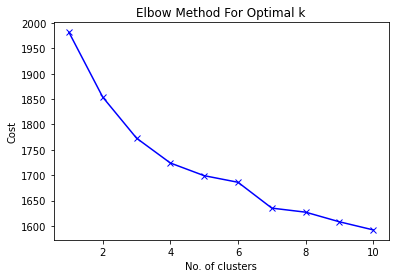

In [27]:
# Elbow curve to find optimal K
cost = []
K = range(1,11)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 11, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [25]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=4, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5, cost: 1759.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 6, cost: 1790.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 5, cost: 1775.0
Run 3, iteration: 2/100, moves: 0, cost: 1775.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 10, cost: 1759.0
Run 4, iteration: 2/100, moves: 0, cost: 1759.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 1, cost: 1731.0
Best run was number 5


array([3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 3,
       0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0,
       3, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 1, 2, 2], dtype=uint16)

In [26]:
df.insert(0, "Cluster", clusters, True)
df

Cluster  Physician_Id  Practitioner_Id   Me_Number Dea_Number  \
0          3      22568412         22568411  6493395003  FG1140944   
1          3      22568442         22568441  6540100165  BN8867523   
2          3      22568815         28232880  7590198007  BK8855453   
3          3      22569083         49972908  9135789001  FR7277280   
4          0      22569139         31288896  9150388027  BE9639925   
..       ...           ...              ...         ...        ...   
192        2        419657          3339546  0350168079  AN6070938   
193        1        407872           407872  0300579147  FW0434403   
194        1        407872          3473935  0300579147  FW0434403   
196        2        397724           397724  0280367070  AW9579523   
198        2        395985         27486469  0280275134  BN8626028   

          Last_Name First_Name  \
0    GONZALEZ-AYALA     RAFAEL   
1            NADDAF       NAJA   
2        KULIKOWSKI      PIOTR   
3             ROLFE     NATALI   
4          ELSHAFEI     ASHRAF   
..              ...        ...   
192       NICHOLSON     ROBERT   
193         WHITTED      PETER   
194         WHITTED      PETER   
196          WAHNON    CHARLES   
198          NELSON      BRUCE   

                                               Address            City State  \
0    1605 SOUTH 31ST STREET CENTER FOR DIAGNOSTIC M...          TEMPLE    TX   
1                             806 S DOUGLAS RD STE 820           MIAMI    FL   
2                              6400 CLAYTON RD STE 303     SAINT LOUIS    MO   
3                                     1044 BELMONT AVE      YOUNGSTOWN    OH   
4                                          420 64TH ST        BROOKLYN    NY   
..                                                 ...             ...   ...   
192                                          PO BOX 66       SKOWHEGAN    ME   
193                             715 HARMONY ST STE 300  COUNCIL BLUFFS    IA   
194                             715 HARMONY ST STE 300  COUNCIL BLUFFS    IA   
196                                   40 EVERGREEN ROW          ARMONK    NY   
198                                    2400 32ND AVE S           FARGO    ND   

       Zip Specialty_Code Specialty_Description           Npi Opt_Out_Ind  \
0    76508             IM     INTERNAL MEDICINE  1.033378e+09           N   
1    33134             IM     INTERNAL MEDICINE  1.255316e+09           N   
2    63117             IM     INTERNAL MEDICINE  1.053389e+09           N   
3    44504             IM     INTERNAL MEDICINE  1.275525e+09           N   
4    11220              P            PSYCHIATRY  1.083817e+09           N   
..     ...            ...                   ...           ...         ...   
192   4976            OPH         OPHTHALMOLOGY  1.659482e+09           N   
193  51503            OPH         OPHTHALMOLOGY  1.558344e+09           Y   
194  51503            OPH         OPHTHALMOLOGY  1.558344e+09           Y   
196  10504            OPH         OPHTHALMOLOGY  1.801166e+09           N   
198  58103            OPH         OPHTHALMOLOGY  1.164441e+09           N   

    Opt_Out_Date  
0     1899-12-30  
1     1899-12-30  
2     1899-12-30  
3     1899-12-30  
4     1899-12-30  
..           ...  
192   1899-12-30  
193   2008-08-07  
194   2008-08-07  
196   1899-12-30  
198   1899-12-30  

[160 rows x 16 columns]